In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory = False)

In [11]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

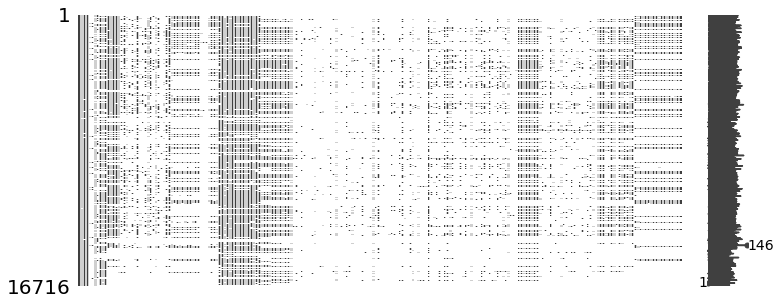

In [14]:
# !pip install missingno
import missingno as msno

msno.matrix(mcq, figsize = (12,5))

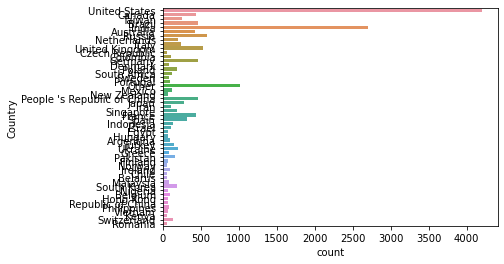

In [19]:
#국가를 보고 싶다

sns.countplot(y = 'Country', data =mcq)

In [7]:
# 나이에 대한 plot
sns.distplot(mcq[mcq['Age']> 0]['Age'], bins = 10000)

Error in callback <function flush_figures at 0x7fa76b048af0> (for post_execute):


KeyboardInterrupt: 

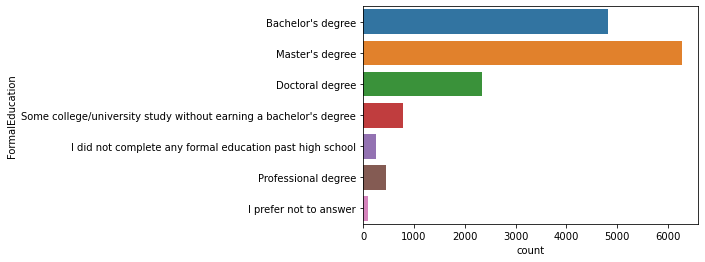

In [8]:
sns.countplot(y = 'FormalEducation', data = mcq)

In [9]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize = True))

#합친다

mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index = True, right_index = True)

mcq_major_df.columns = ['응답 수', '비율']

mcq_major_df
 

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


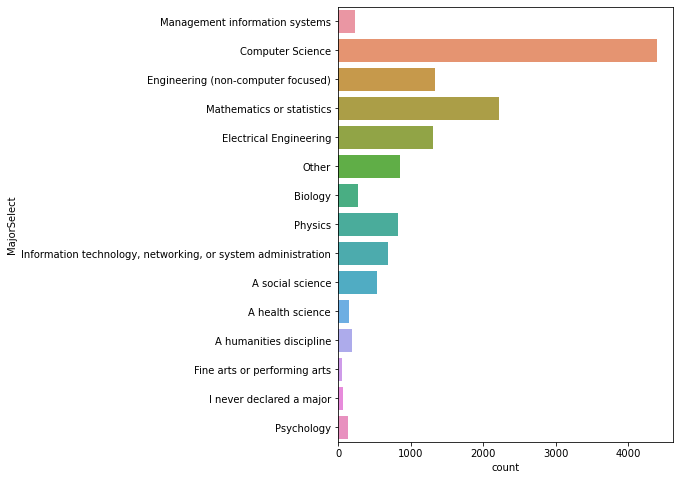

In [10]:
plt.figure(figsize = (6, 8))
sns.countplot(y = 'MajorSelect', data = mcq)

In [11]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize = True))

mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True , right_index = True)

mcq_es_df.columns = ['응답 수 ','비율']
mcq_es_df


,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


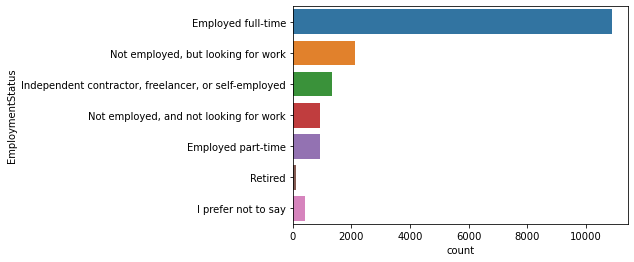

In [13]:
sns.countplot(y = 'EmploymentStatus', data = mcq)

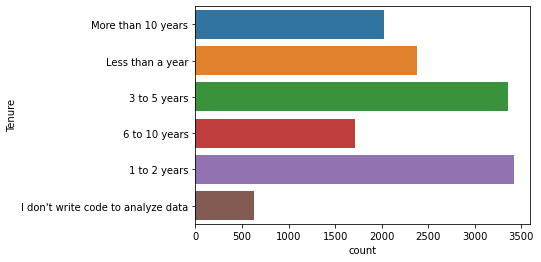

In [14]:
sns.countplot(y = 'Tenure', data =mcq)

<function matplotlib.pyplot.show(*args, **kw)>

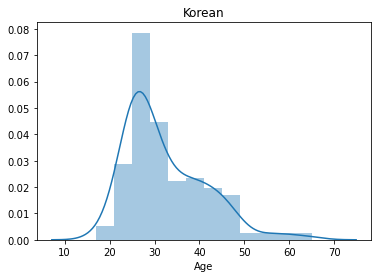

In [19]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show

In [21]:
koreagender = pd.DataFrame(korea['GenderSelect'].value_counts())

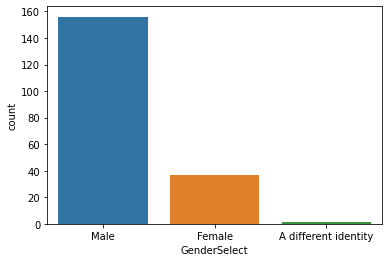

In [24]:
sns.countplot(x = 'GenderSelect', data = korea)

In [29]:
korea_employ_count = pd.DataFrame(korea['EmploymentStatus'].value_counts())
korea_employ_percent = pd.DataFrame(korea['EmploymentStatus'].value_counts(normalize = True))
korea_employ_status = korea_employ_count.merge(korea_employ_percent, left_index = True, right_index = True)
korea_employ_status

,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,116,0.597938
"Not employed, but looking for work",34,0.175258
"Not employed, and not looking for work",15,0.077320
"Independent contractor, freelancer, or self-employed",13,0.067010
I prefer not to say,8,0.041237
Employed part-time,7,0.036082
Retired,1,0.005155


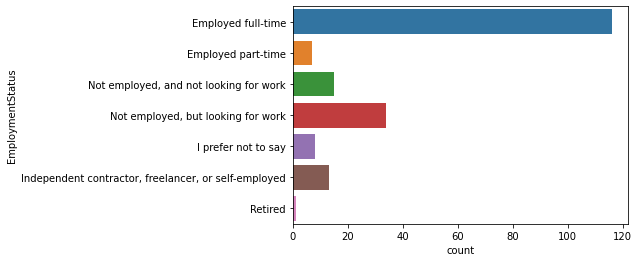

In [32]:
sns.countplot(y = 'EmploymentStatus', data = korea)